<a href="https://colab.research.google.com/github/guabriola/MIT_DataScience_MachineLearning/blob/main/Project_Assessment_Classification%26HypothesisTesting_ExtraaLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To split data
from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview


In [ ]:
#Reading data from .csv file.
data = pd.read_csv('/content/drive/MyDrive/DataScience&ML(MIT)/5-Classification and Hypothesis Testing/Project_Assessment_Classification_and_Hypothesis_Testing/ExtraaLearn.csv')

df = data.copy()

In [ ]:
#First 5 rows of the data
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
#Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Observations:
- We have 4612 rows and 15 columns.
- There are no missing values.
- Ten columns with Object Dtype.
- Five columns with numeric Dtype.

In [ ]:
# Checking unique values in each column
df.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


Observations:
- ID doesn't give any information, it's unique for each lead.
- Continuous numerical columns: age, website_visits, time_spent_on_website, page_views_per_visit.
- Categorical columns: current_occupation, first_interaction, profile_completed,last_activity
- The 'first_interaction' variable could be transformed into a binary format.
- Categorical (Yes or No): print_media_type1, print_media_type2, digital_media, educational_channels, referral.
- Categorical Target variable: status.

In [ ]:
#Dropping ID column
df = df.drop(['ID'], axis=1)

In [ ]:
# Creating numerical columns
num_cols=['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Creating categorical variables
cat_cols= ['current_occupation', 'first_interaction', 'profile_completed','last_activity',
           'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels',
           'referral', 'status']

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


### Missing Value Treatment

- Data doesn't have missing values

### Feature engineering

- It is not necessary transform first_interaction feature in to binary I'll work with it like it is.
- We will convert 'yes' and 'no' features into binary (0 and 1) representations. This numerical format is more suitable for machine learning algorithms so it will be done before ML.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### Univariate analysis of numerical columns and Outlier Detection


In [ ]:
num_cols

['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

In [ ]:
# Defining the hist_box() function
def hist_box(data, col, title, mode=False):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    if title:
      f.suptitle(title)

    sns.boxplot(data=data, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=data, x=col, kde=True, ax=ax_hist)

    ax_hist.axvline(
        data[col].mean(), color = "green", linestyle = "--"
    ) # Add mean to the histogram
    ax_hist.axvline(
        data[col].median(), color = "black", linestyle = "-"
    ) # Add median to the histogram
    if mode == True:
      ax_hist.axvline(
          data[col].mode()[0], color = "blue", linestyle = "-"
      ) # Add mode to the histogram
    plt.show()

#### Checking Summary Statistics

In [ ]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


#### Hist and Box Plots.

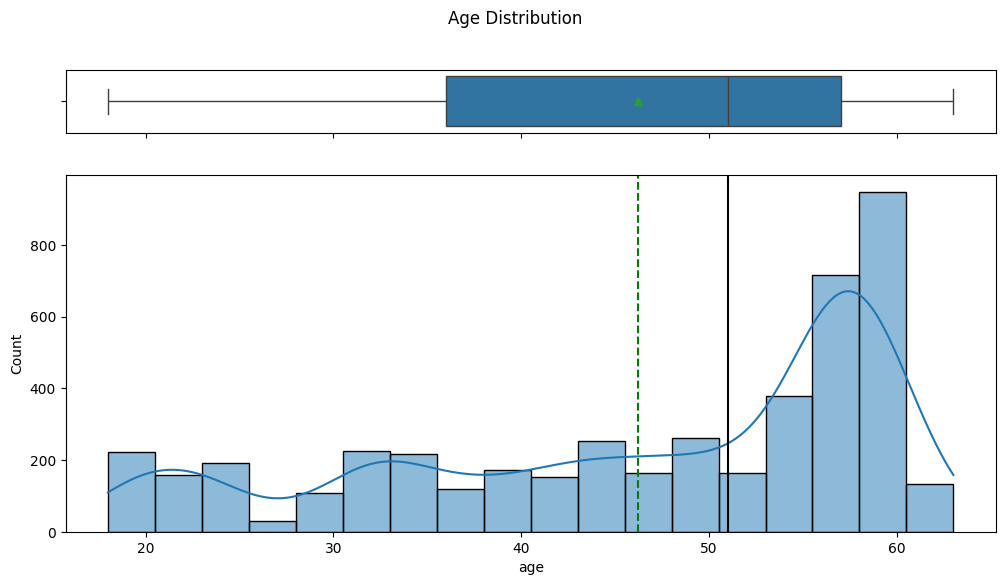

In [ ]:
hist_box(df, 'age', 'Age Distribution')

Observations:
- Heavily left skewed distribution, most people in the dataset are older, but there are fewer very young individuals, and the younger ages are spread out. This is why the mean it is lower.
- Most leads are people older than 40 years old.
- Mean age is 46, and median age is 51.
- Not outliers.

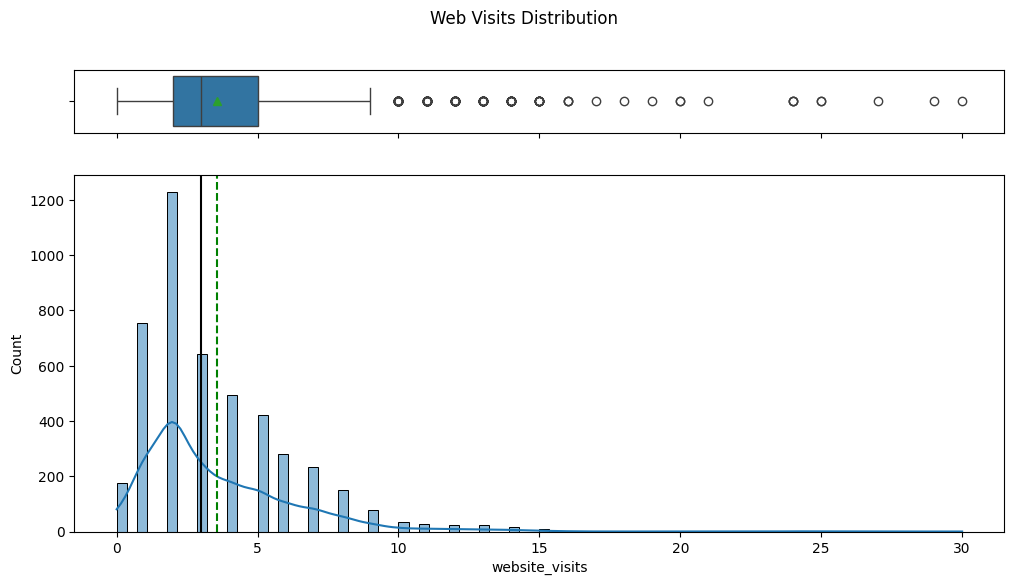

In [ ]:
hist_box(df, 'website_visits', 'Web Visits Distribution')

In [ ]:
(df['website_visits']>16).sum()

14

Observations:

- Heavily right skewed distribution, tell us most leads visits the web a few times.
- Mayor number of leads visit the website between 0 and 5 times.
- Median and Mean are close, but median it lower what correspond with a left skewed distribution.
- The mean and median are both below 5 visits, emphasizing the concentration of low values.
- The majority of website visits fall between 0 and 10 visits, with very few individuals exceeding this range.
- It has outliers, there are 14 outliers (individuals with more than 16 website visits).

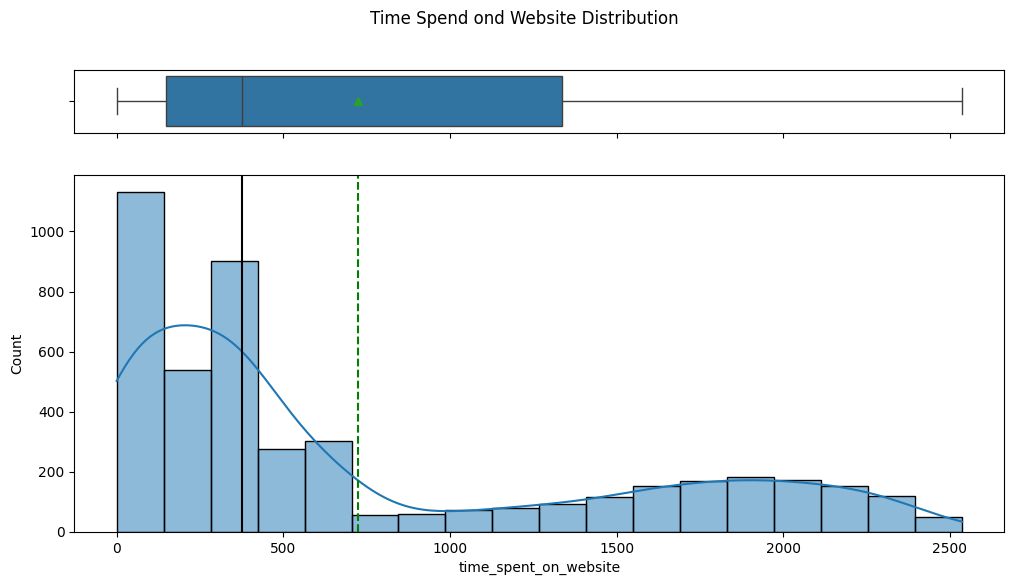

In [ ]:
hist_box(df, 'time_spent_on_website', 'Time Spend ond Website Distribution')

In [ ]:
(df['time_spent_on_website']>1500).sum()

1038

Observations:
- Heavily right skewed distribution, wich means that most of leads spend short time on website. But there are considerable number of leads spending more time on website.
- Mean es considerable bigger than Median wich correspond with this leads spending more time on the website.
- Most users spend less than 1000 units of time on the website.
- A considerable  proportion of users fall into the higher ranges of time spent.
- Doesn't have outliers.

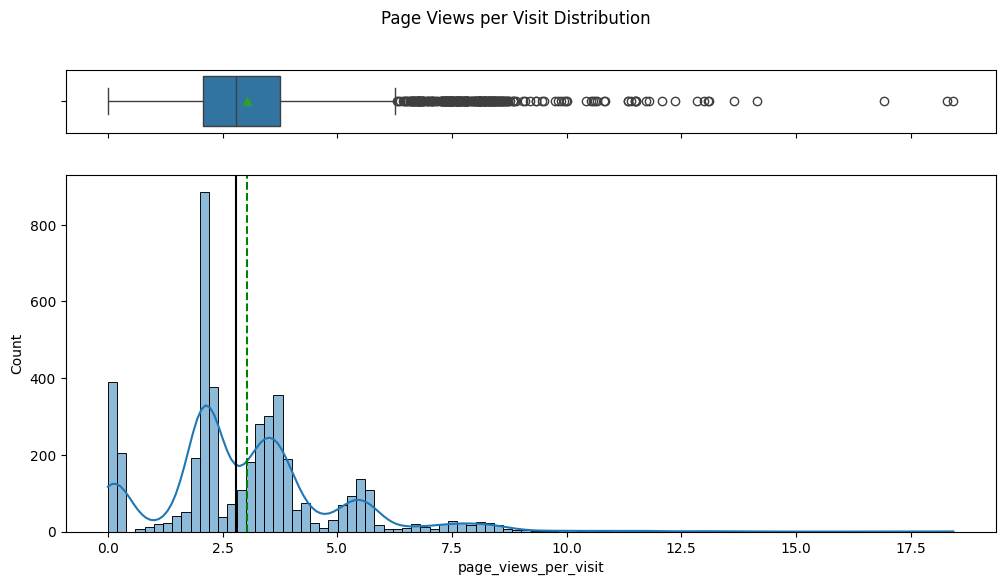

In [ ]:
hist_box(df, 'page_views_per_visit', 'Page Views per Visit Distribution')

In [ ]:
(df['page_views_per_visit']>6.5).sum()

250

Observations:

- Heavely right skewed distribution, the majority of users fall within the range of 0 to 6 page views per visit, while a smaller number of users have very high page views per visit(Up to 18).
- Mean of page visit is 3 litle higer than the median wich is rasonable for a right skewed distribution with outliers.
- The boxplot shows numerous outliers above the upper whisker. Specifically, there are 250 users with more than 6.5 page views per visit.

#### Observations:

- We will keep the outliers and address them with logarithmic transformations.
- It os necessary check correlation between these variables, in order to determine if Age afect time spend and web site visits.
- Further investigation is needed to understand how these features affect the status, based on this distributions, might be a clear correlation.
- It may be important to implement changes to make the website more appealing to younger people.
- People seams to be more likely to not spend to much time visiting the website. This could be because they quickly find what they are looking for, or they are not satisfied with what they find.
- It will be necessary to investigate why some people spend more time on the website or identify which users take longer to find what they need.

### Univariate analysis of categorical columns

In [ ]:
# Showing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*40)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
****************************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
****************************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
****************************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
****************************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
****************************************
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
****************************************
educ

#### Observations:
- **Rate convertion** to a paid customer is 29.8% wich is impressive for a startup in the EdTech space where the rates are between 2% and 10%.
- The numbers of current **ocupation** shows that maybe they are not targeting how they will students because they are only the 12% of the leads. Less than professionals (57%) and unnemployed (31%).
- Almost all the leads have their **profiles** either highly or partially complete (97%).
- Half of the users have their **last activity** as email, while the other half is almost evenly split between phone and website activities.
- The low numbers shows for **print_media_type1** (10%), **print_media_type2** (5%), **digital_media** (11%), **educational_channels** (15%), that users are generally less engaged with these media categories.
However, there is a clear preference hierarchy leaded for educational_channels and digital_media. That could show that the company is already struggling to capture student leads.
- **Referral** dosn't seems to be good numbers, this could indicate that user are not highly engaged or the company dosn't have a good program for referreals.

### Bivariate and Multivariate analysis

#### Numerical features correlations

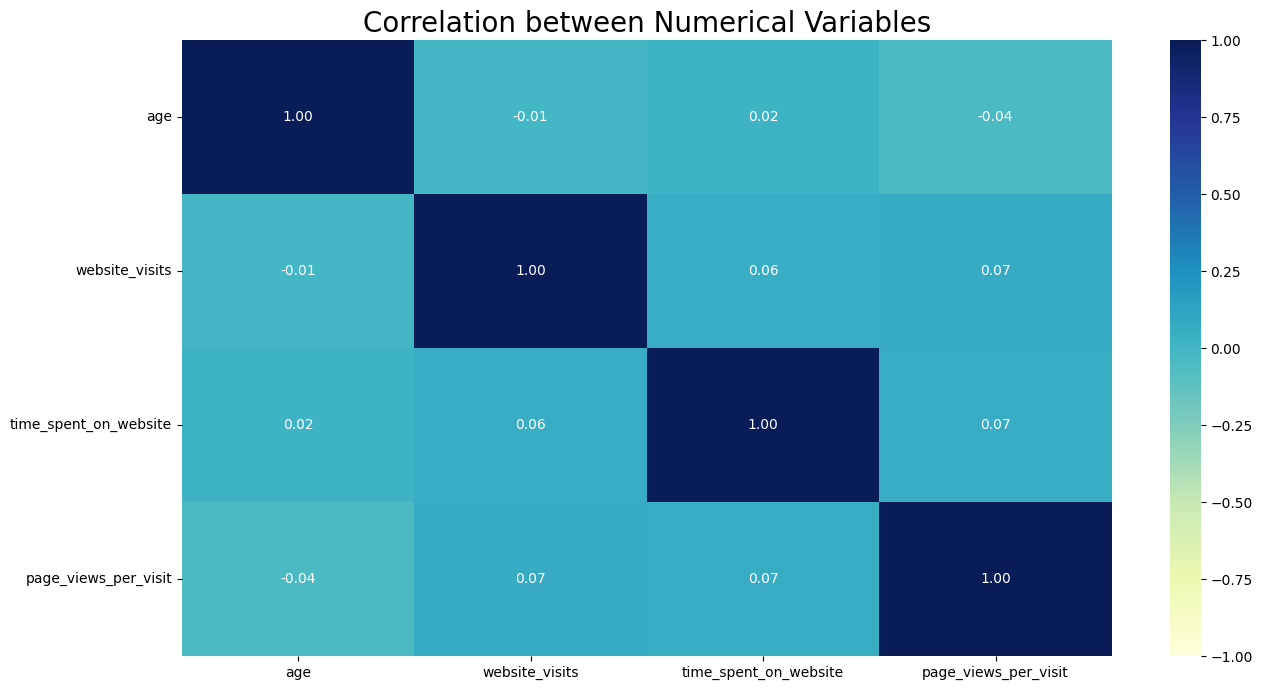

In [ ]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(df[num_cols].corr(),annot=True,vmin=-1, vmax=1, fmt='0.2f', cmap='YlGnBu')
plt.title('Correlation between Numerical Variables', size=20)
plt.show()

Observation:
- There is no significant correlation between numerical features.

#### How Categorical Features Relate with Convertion Rate

In [ ]:
cat_cols

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral',
 'status']

In [ ]:
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
#Def function for each plot.
def stacked_barplot(ax, data, predictor, target):

    # Calculate percentages
    crosstab = (pd.crosstab(data[predictor], data[target], normalize='index') * 100)

    # Plot the stacked bar plot
    crosstab.plot(kind='bar', stacked=True, ax=ax, legend=False, color=['#1f77b4', '#ff7f0e'])  # Colors for 0 and 1

    # Annotate percentage of status=1 on each bar
    for idx, rect in enumerate(ax.patches[len(crosstab):]):  # Only annotate the top bars (status=1)
        height = rect.get_height()
        y = rect.get_y() + height / 2  # Center of the bar
        ax.text(rect.get_x() + rect.get_width() / 2, y,
                f"{height:.1f}%", ha='center', va='center', fontsize=9, color='white', fontweight='bold')

    # Add titles and labels
    ax.set_ylabel("Conversion Ratio(%)")
    ax.set_xlabel(predictor)
    ax.tick_params(axis='x', rotation=45)

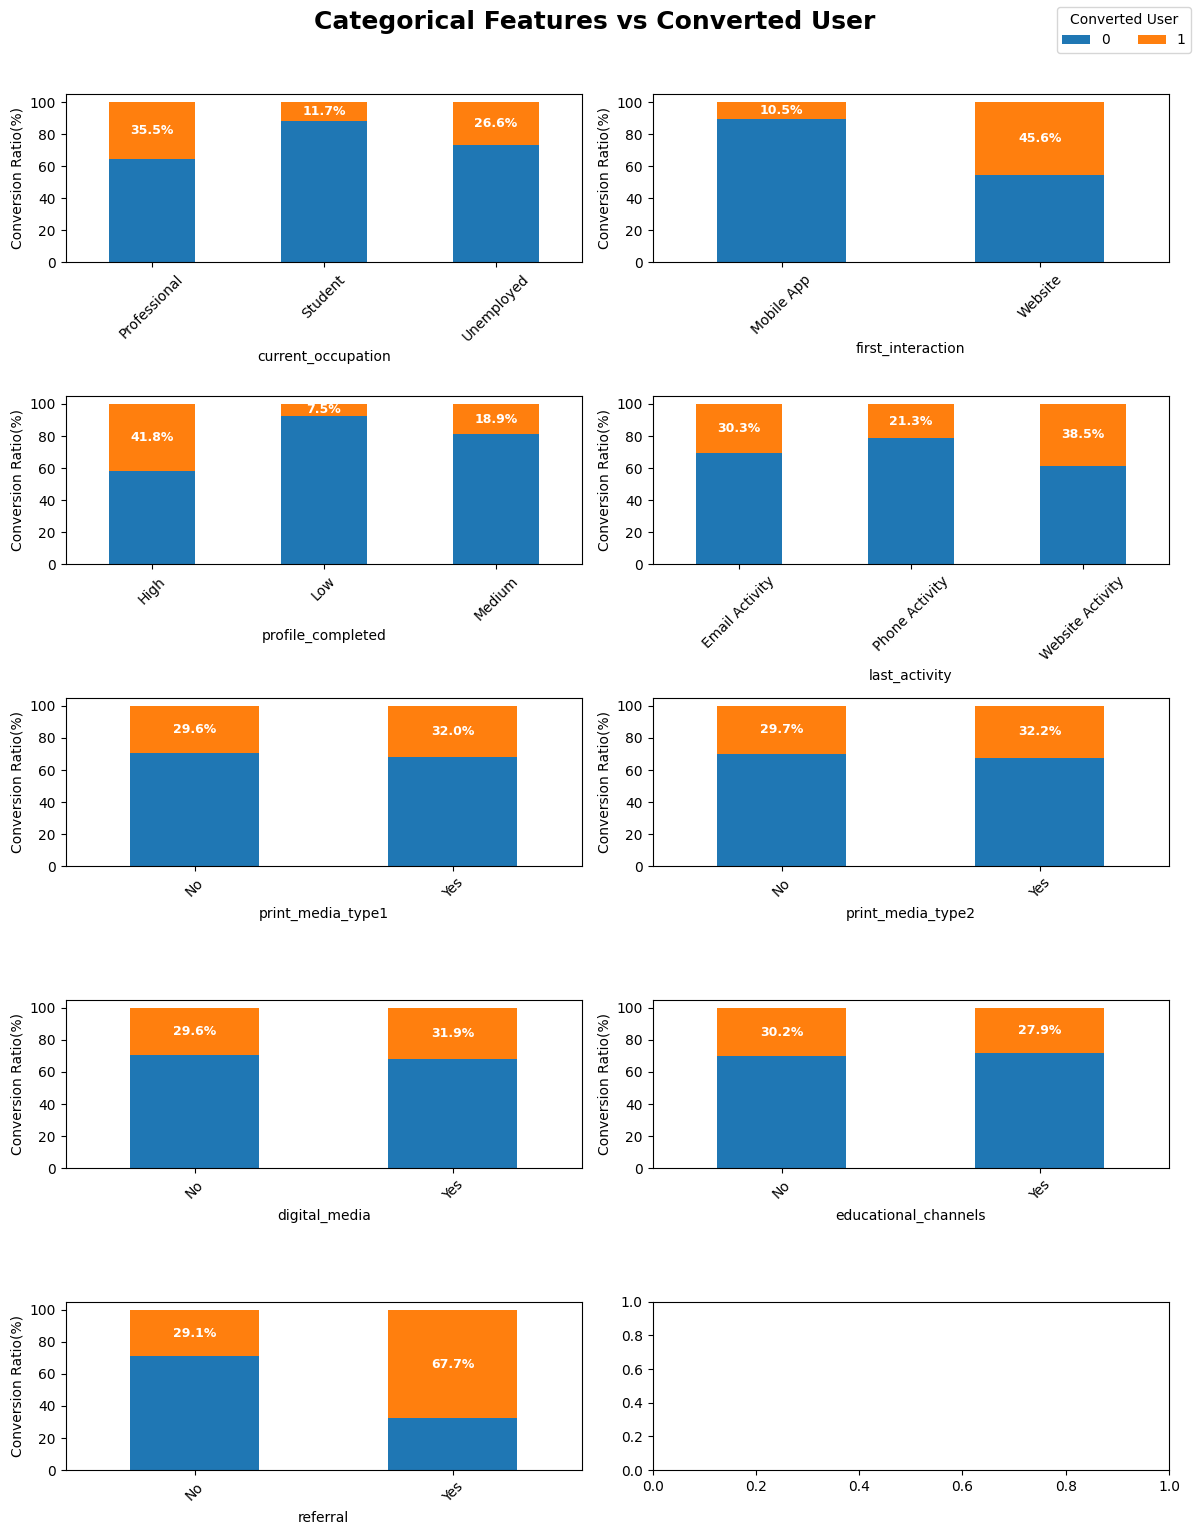

In [ ]:
# Define the target variable
columns = cat_cols[:-1]
# Create a figure
target_col = 'status'

# Create a grid of subplots (3 rows x 3 columns for 9 plots)
fig, axes = plt.subplots(5, 2, figsize=(12, 15))  # Adjust figsize for better visualization
# Flatten axes for easier indexing
axes = axes.flatten()

# Loop through each categorical column and create a plot
for i, columns in enumerate(columns):
    stacked_barplot(axes[i], df, columns, target_col)

# Add an overall title for the plot
fig.suptitle("Categorical Features vs Converted User", fontsize=18, fontweight='bold', y=1.02)

# Adjust layout to leave space for the title
plt.tight_layout(rect=[0, 0, 1, 1])  # Leave space at the top for the title
# Fix legend position
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2, title="Converted User", fontsize=10)


plt.show()

#### Observations:
- **Professional** leads have a higer converstion rate folowed by **Unemployed**, and **Students** have de lowest convertion ratio.(Been a target group, we must have this inconsideration)
- **Website** **first interaction** have large difference with Mobile App conversion rate.
- We can say that the more complete the **profile**, the higher the conversion ratio.
- Olso **Website** is the last activity that the most leads do before convert to paid user followed by **Email Activity**. **Phone Activity** is the lowes one.
- For **print_media_type1**, **print_media_type2**, **digital_media**, looks like slightly improves the conversion ratio. But **educational_channels** show a slightly lower conversion ratio.
- **Referred** leads by paid users have a rate conversion of 68%, the higer of all features. So it will be necessary to apply a better referral policy because as we already know referral are just the %2 of the leads.

#### How Numerical Features Relate with Converted users (status)

In [ ]:
# Mean of numerical variables grouped by converted users
df.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


#### Observations:
- The average age of converted users is significantly higher than that of non-converted users, suggesting that older users are slightly more likely to convert.
- Websit visits and pege views per visit dosn't have relevancy with conversion ratio.
- Converted users spend significantly more time on the website compared to non-converted users. This highlights that users who spend more time engaging with the website are more likely to convert.

#### Conclusions:

- Older users appear to have a higher likelihood of conversion, indicating that marketing efforts might be tailored slightly toward an older audience.

- Time spent on the website is a strong indicator of user conversion. Efforts could focus on increasing engagement, such as improving the website content, providing interactive features, or enhancing the user experience.

### Final Conclusions:


1. **Professional** leads have a higer converstion rate folowed by **Unemployed**, and **Students** have de lowest convertion ratio.(Been a target group, we must have this inconsideration)
2. **Website** **first interaction** have large difference with Mobile App conversion rate.
3. **Website** is the last activity that the most leads do before convert to paid user followed by **Email Activity**. **Phone Activity** is the lowest one.
4. For **print_media_type1**, **print_media_type2**, **digital_media**, looks like slightly improves the conversion ratio. But **educational_channels** show a slightly lower conversion ratio. **Referred** leads by paid users have a rate conversion of 68%, the higer feature. So it will be necessary to apply a better referral policy because as we already know referral are just the %2 of the leads.
5. We can say that the more complete the **profile**, the higher the conversion ratio.

## Model Building - Approach

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

### **Data preparation**

#### Categorical Variables to Dummy and binary




In [ ]:
# Making a copy of the data frame
prepared_df = df.copy()

In [ ]:
#Selecting the columns to transform to dummies
cat_to_dummy = ['current_occupation', 'first_interaction', 'last_activity']

In [ ]:
#Selecting columns to Map to 1 and 0
cat_to_binary = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels',
           'referral']

In [ ]:
# Creating dummy variables
prepared_df = pd.get_dummies(data = prepared_df, columns = cat_to_dummy, drop_first = True)

#Mapping Yes and No features to True or False
prepared_df[cat_to_binary] = prepared_df[cat_to_binary].applymap(lambda x: False if x == 'Yes' else True)

# Mapping profile_completed to Low to High in 1 2 and 3
prepared_df['profile_completed'] = prepared_df['profile_completed'].map({'Low': 1, 'Medium': 2, 'High': 3})

In [ ]:
prepared_df

,age,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,last_activity_Phone Activity,last_activity_Website Activity
0,57,3,7,1639,1.861,False,True,False,True,True,1,False,True,True,False,True
1,56,2,2,83,0.320,True,True,True,False,True,0,False,False,False,False,True
2,52,2,3,330,0.074,True,True,False,True,True,0,False,False,True,False,True
3,53,3,4,464,2.057,True,True,True,True,True,1,False,True,True,False,True
4,23,3,4,600,16.914,True,True,True,True,True,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,2,15,360,2.170,True,True,True,False,True,0,False,True,False,True,False
4608,55,2,8,2327,5.393,True,True,True,True,True,0,False,False,False,False,False
4609,58,3,2,212,2.692,True,True,True,True,True,1,False,False,True,False,False
4610,57,2,1,154,3.879,False,True,True,True,True,0,False,False,False,False,True


In [ ]:
df

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


#### Trasnform and Scale Features

I decided not to apply logarithmic transformations for outliers treatment or scale the features because it is not strictly necessary when working with decision trees or random forests. For this reason is not necessary transform Int Dtypes to Float.

#### Separating the independent variables and the dependent variable.

In [ ]:
# Separating target variable and other variables
y= prepared_df.status
X= prepared_df.drop(columns = ['status'])

**Splitting the data into 70% train and 30% test set**

I will use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [ ]:
# Splitting the dataa
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

## **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting that a lead will convert to a paid user when it does not actually convert.

2. Predicting that a lead will not convert to a paid user when it actually does convert.

**Which case is more important?**

- **Predicting that a lead will not convert but it does convert.** This would be a bigger issue for ExtraaLearn because losing potential customers reduces the company's revenue opportunities and hampers growth in a competitive market.The objective of this study is to kwnow wich leads are more likely to convert to paid customers.

- **The company would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives very well, so that they can allocate resources accordingly, in order to improve convertition ratios.

**How to achieve this?**


- **Adjusting the Decision Threshold:** Lower the threshold for classification, which increases Recall at the expense of Precision.
- **Optimizing Model Hyperparameters:** Focus on hyperparameters that improve Recall during model tuning.
- **Using Weighted Metrics:** Incorporate class weights to give more importance to the minority class (leads that convert).

## Building a Decision Tree model

### Before  start, lets create a metric function to show classification report.

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Kwnowing that 29.8% it will convert and on the other hand 70.2% will not convert we have to adjust class_weigth hyperparameter in order that the second class will not turn dominant in the decision tree.

In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.298, 1: 0.702}, random_state = 1)

In [ ]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.298, 1: 0.702}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



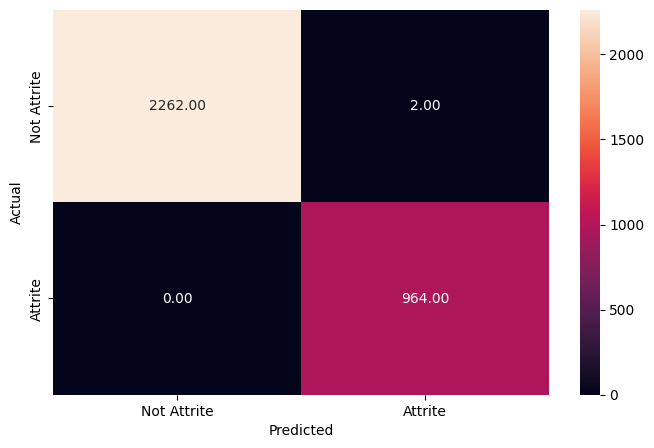

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observations:**
* No errors on the training set, each sample has been classified correctly.
* Model has performed perfect on the training set.
* Decision grow and classify each data point correctly if no restrictions are applied.

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       971
           1       0.68      0.65      0.67       413

    accuracy                           0.81      1384
   macro avg       0.77      0.76      0.77      1384
weighted avg       0.80      0.81      0.80      1384



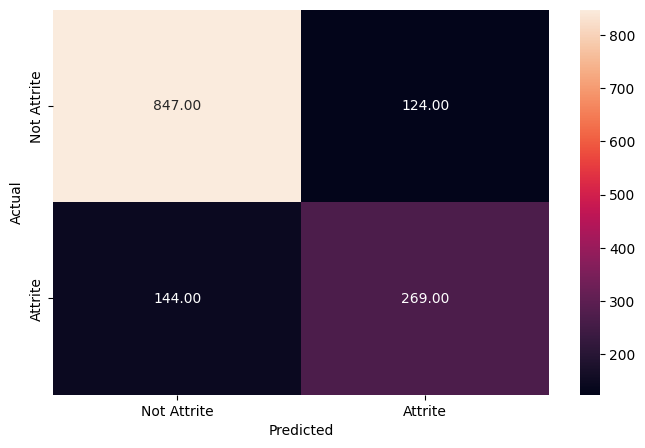

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

* The decision tree model is clearly overfitting.
* We will have to tune the decision tree to reduce the overfitting.

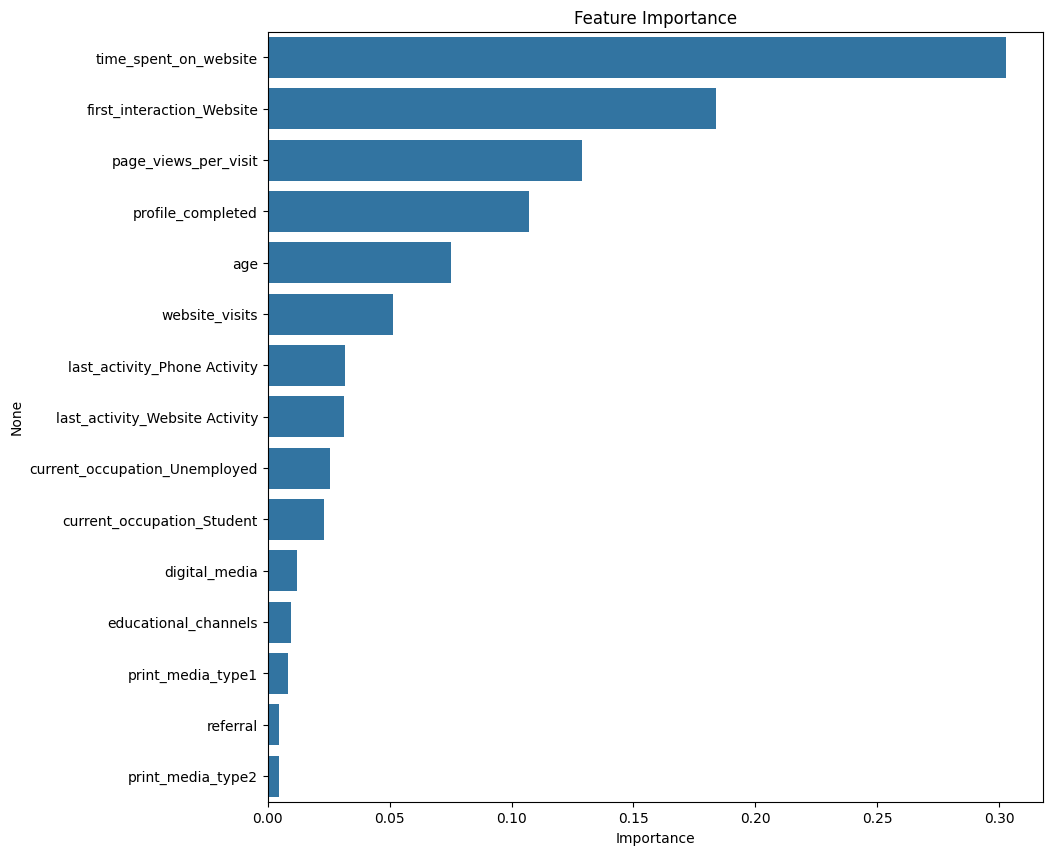

In [ ]:
# Plot the feature importance

importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 10))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.title('Feature Importance')
plt.show()

**Observations:**
Five more important features in order are time spend on website, first interaction in web site, page views per visit, profile completed and age.

#### **Visualizing the Decision Tree**

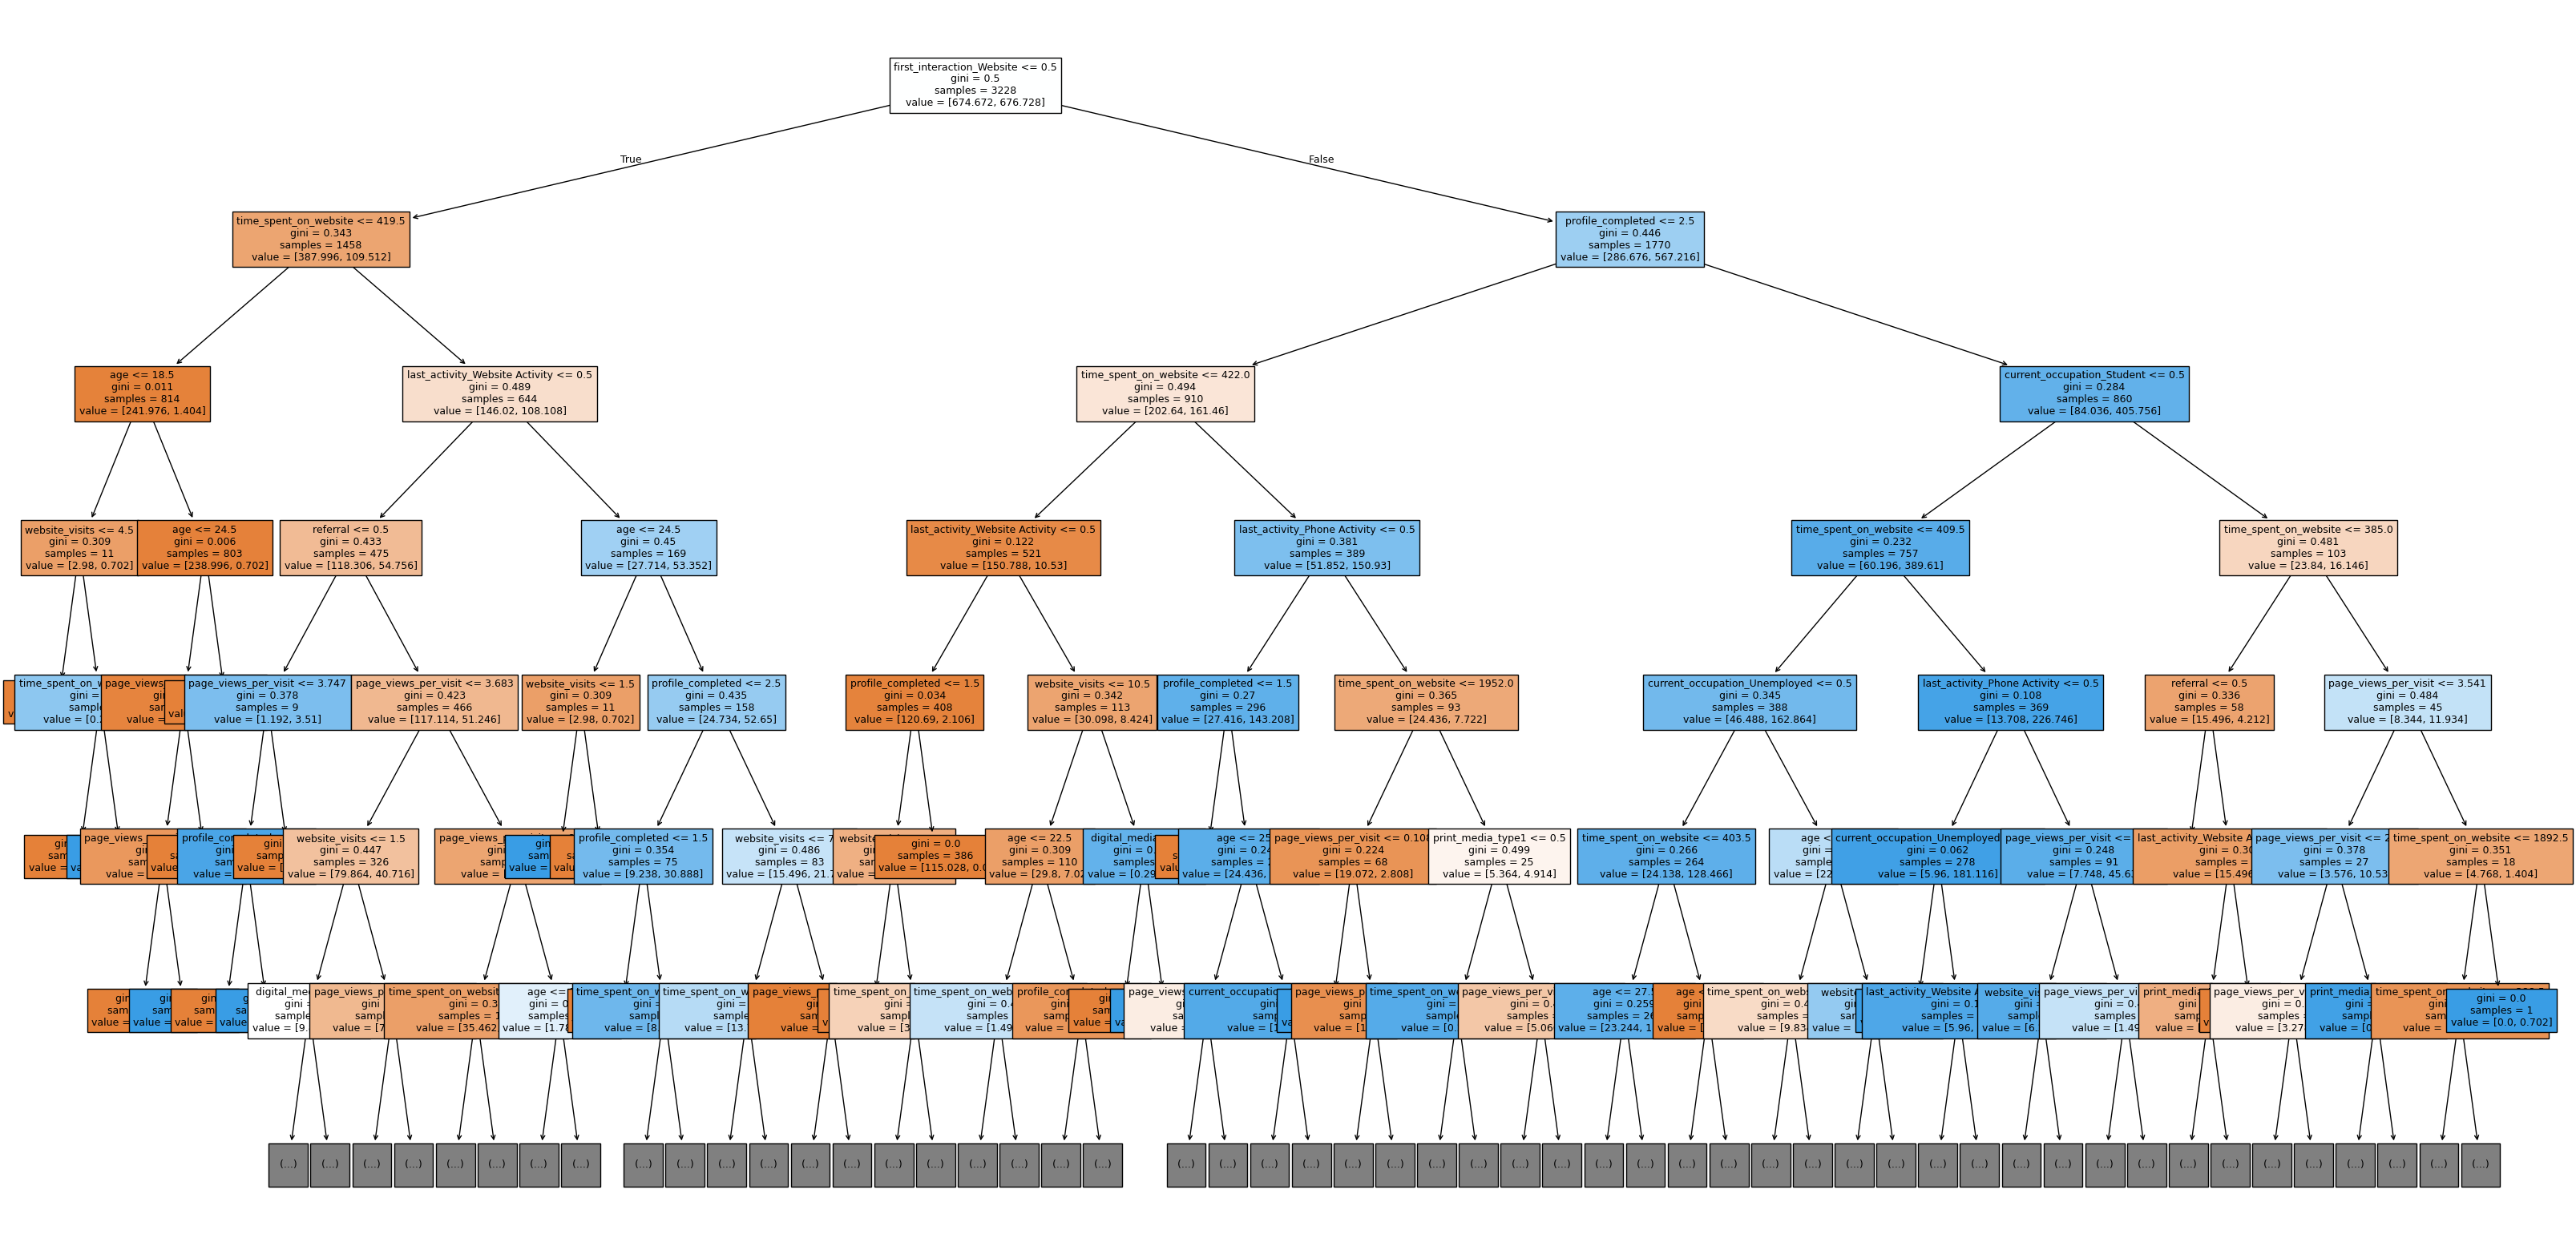

In [ ]:
feature_names = list(X_train.columns)
plt.figure(figsize=(40, 20))
out = tree.plot_tree(
    dt,
    max_depth=6,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## Do we need to prune the tree?

Yes, We will have to tune the decision tree to reduce the overfitting

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,30,2),
    "max_leaf_nodes": [10, 20, 50, 100, 200],
    "min_samples_split": [2, 10, 20, 50],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, random_state=1)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2264
           1       0.73      0.78      0.75       964

    accuracy                           0.85      3228
   macro avg       0.82      0.83      0.82      3228
weighted avg       0.85      0.85      0.85      3228



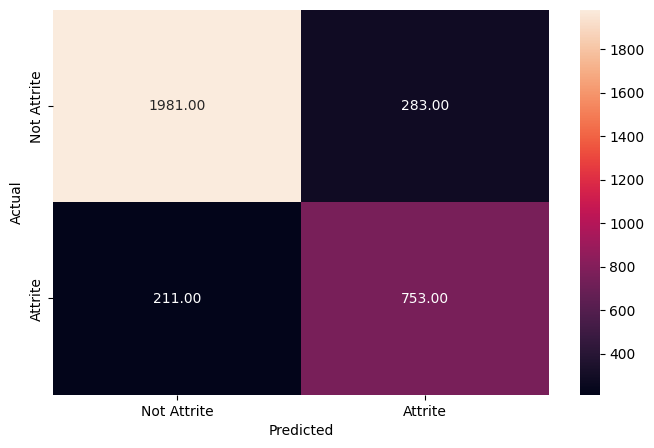

In [ ]:
# Checking performance on the test dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       971
           1       0.72      0.78      0.75       413

    accuracy                           0.84      1384
   macro avg       0.81      0.82      0.82      1384
weighted avg       0.85      0.84      0.84      1384



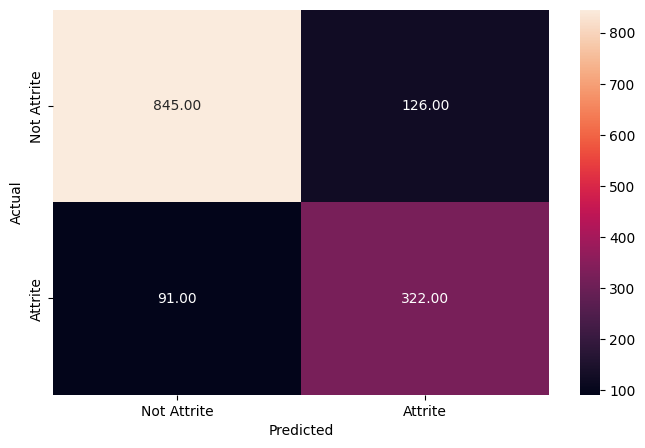

In [ ]:
# Checking performance on the testing dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

**Observations:**
1.  Recall Improvement
  - Base Decision Tree: 0.63
  - Tuned Decision Tree: 0.78

2. Precision Impact
  - Base Decision Tree: 0.66
  - Tuned Decision Tree: 0.72

We can se significant improvements in recall, wich is likely the primary focus for this project. Identify converting leads.
This makes the model more effective minimizing false negatives.

## Building a Random Forest model

In [ ]:
# Random Forest classifier
rf_estimator = RandomForestClassifier(class_weight = {0: 0.298, 1: 0.702}, random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.298, 1: 0.702}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



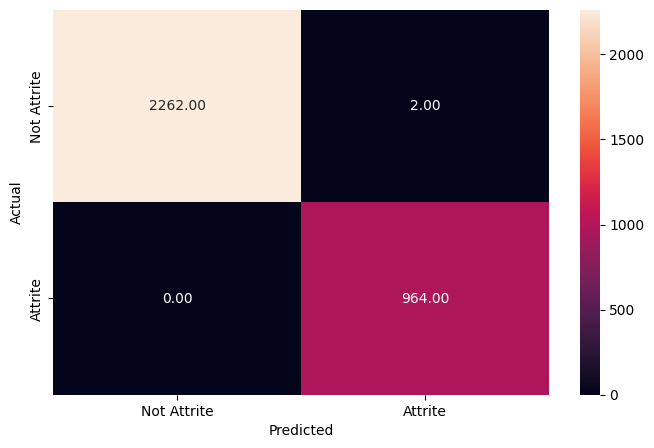

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       971
           1       0.80      0.71      0.75       413

    accuracy                           0.86      1384
   macro avg       0.84      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



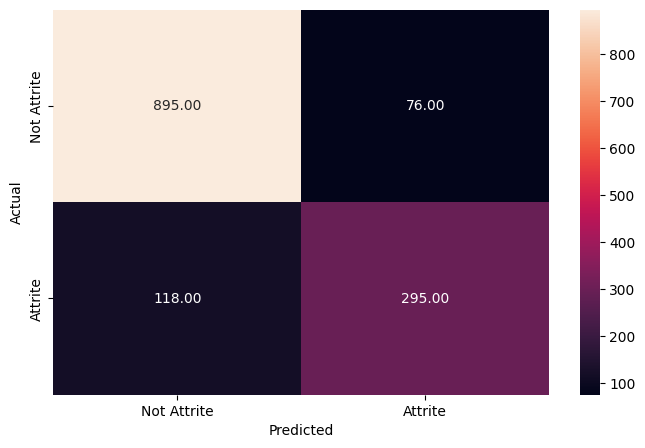

In [ ]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

**Observations:**
As we can see, this model it is better than the regular decision tree. But it's note performing better than the tuned decision tree model.

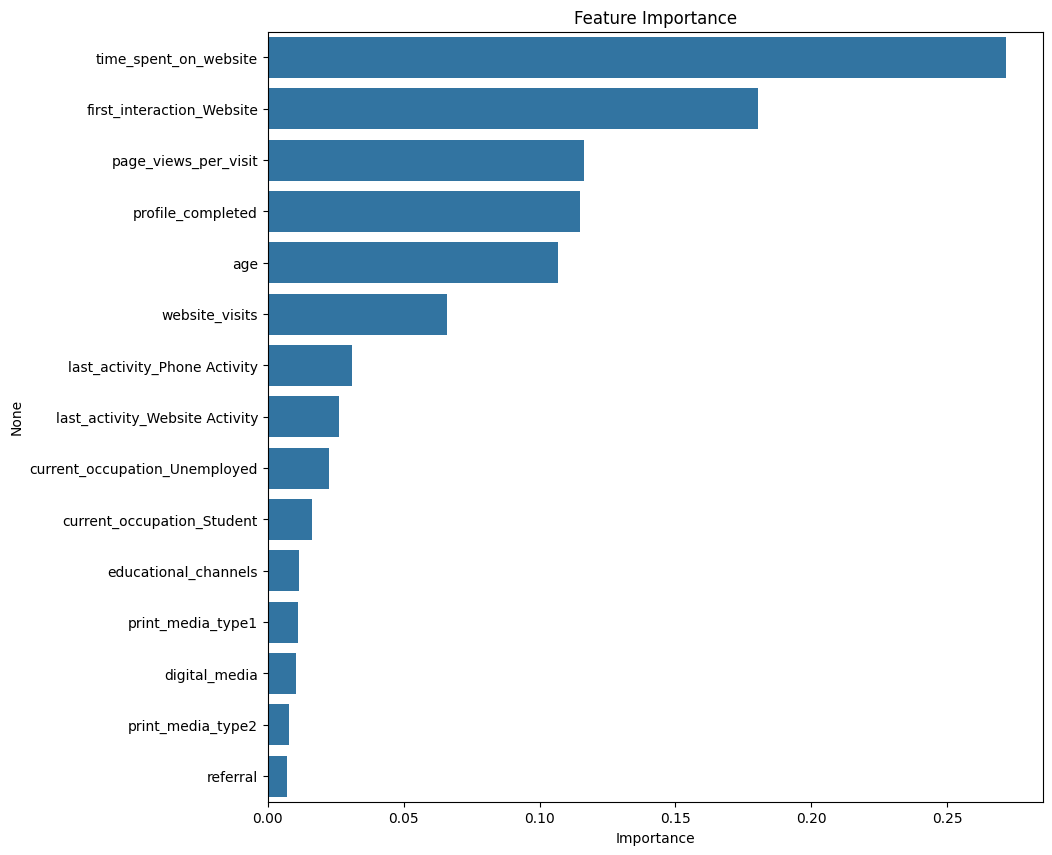

In [ ]:
# Plot the feature importance
importances = rf_estimator.feature_importances_
columns = X.columns
importance_rf = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (10, 10))
sns.barplot(data = importance_rf, x = importance_rf.Importance, y = importance_rf.index)
plt.title('Feature Importance')
plt.show()

**Observations:**
Like in the last plot based on the decision tree model, here again we can see that most importan contributors to make a lead become a paid user are website usage, how complete is their profile and age.

## Do we need to prune the tree?

Yes, it doesn't perfom better than the tuned decision tree model.

In [ ]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.298, 1: 0.702}, random_state = 1)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider when looking for the best split
}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, param_grid, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.298, 1: 0.702}, max_depth=5,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2264
           1       0.68      0.89      0.77       964

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.87      0.84      0.85      3228



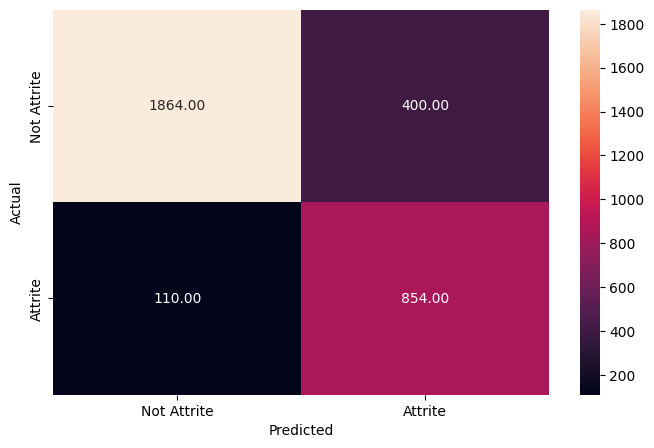

In [ ]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       971
           1       0.68      0.86      0.76       413

    accuracy                           0.84      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.86      0.84      0.84      1384



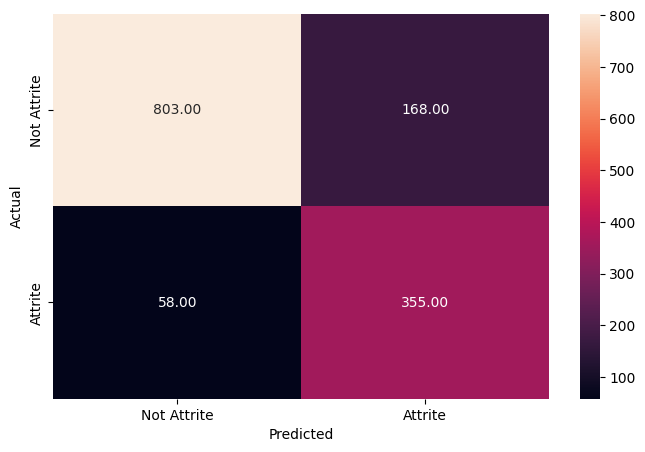

In [ ]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**
- Has higher recall for the positive class, 86% vs 78%. This is a significant imporvent in line with the objective of the study.
- Precision it is a little less, but is de price that have to pay to improve recall.
- F1-score, stay quite close, so the balance of precision and recall doesn't change.

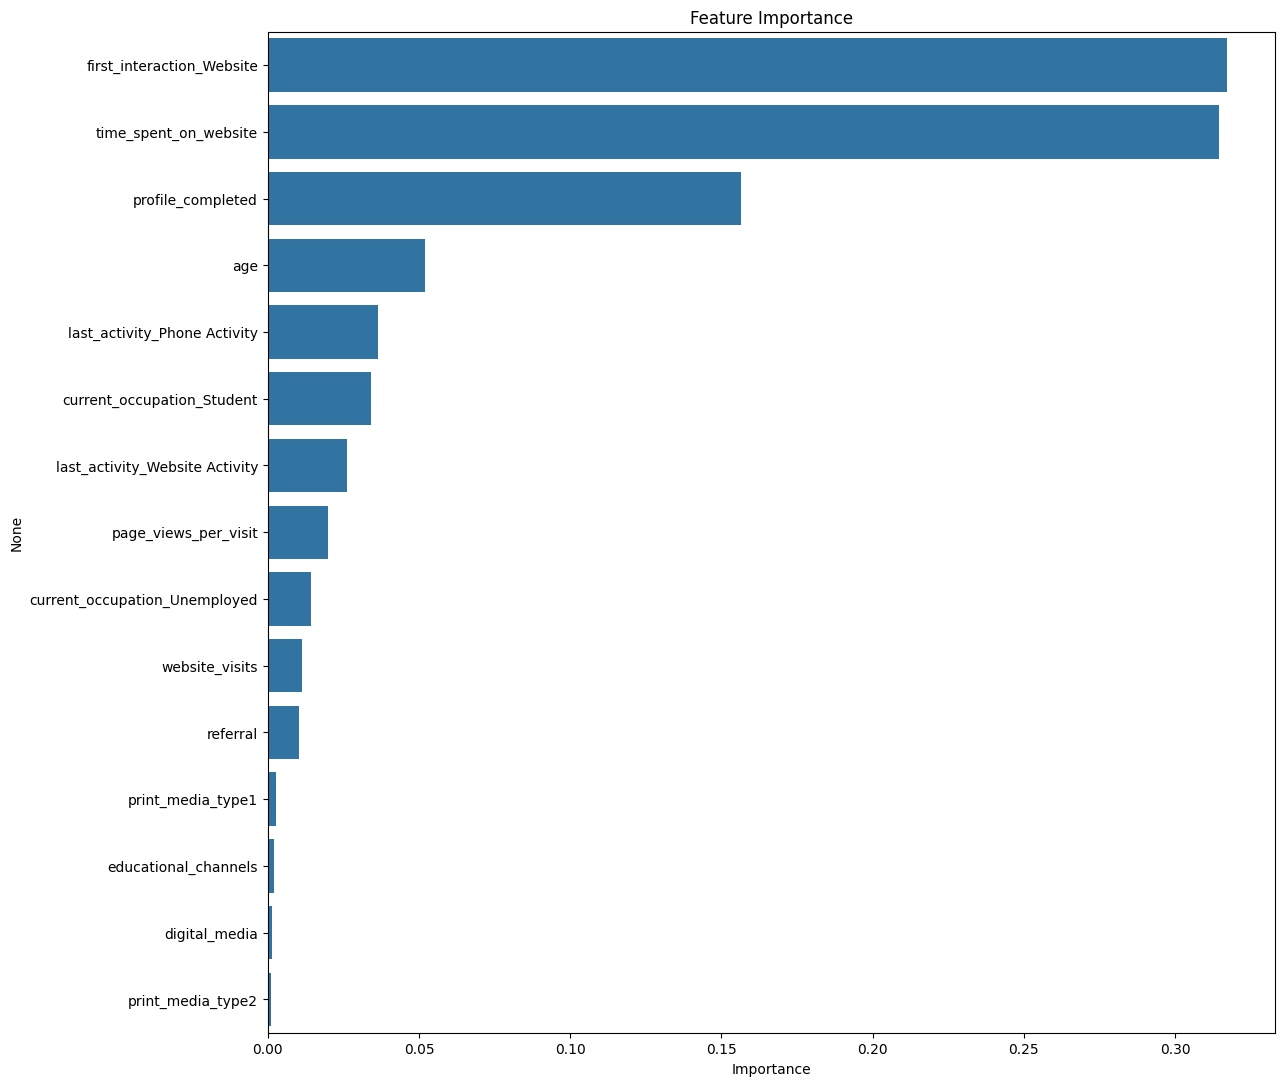

In [ ]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)
plt.title('Feature Importance')
plt.show()

**Observations:**
Like in the last two plots, here again we can see that most importan contributors to make a lead become a paid user are website usage, how complete is their profile and age.

### Models Overall Conclusion:
While the decision tree has slightly higher precision, the superior recall of the random forest model for the positive class (lead conversion) makes it the best choice for ExtraaLearn's goal.


It is more beneficial to identify more leads (higher recall), even if it carries a slightly higher risk of misclassifying some leads. This is because the cost of losing a lead (false negative) is likely greater than the cost of misclassifying a lead who doesn't convert (false positive).

## Actionable Insights and Recommendations

--------------------------------------------------------------------------------
**Key Takeaways:**
- **Important Features Driving Lead Conversion:**
  - **First interaction via website and Time Spent on Website.**
    - It's proved that the most effective interaction for lead convertion it's with Website.
  - **Profile Completition.**
    - More complete the progile, more likely to convert.
  - **Age.**
    - Older leads tent to have higher convertion rate.  
  - **Last Activity.**
    - Website Activity as the last interaction has the highest conversion rate.
  - **Current ocupation.**
    - Professionals are more likely to convert and stuents are the ones with less conversion rates.
  - **Referral.**
    - Have a rate conversion of 68%, the higer of all features but represents only the 2% of the leads.
- **Features with Low Influence:**
  - Digital Media, Print Media, and Educational Channels.
--------------------------------------------------------------------------------

**Profile of Likely Converters:**
- **Demographics:**
  - Professionals, aged 45 or older.
- **Behavioral Traits:**
  - Spend significant time on the website.
  - Have high or medium profile completion rates.
  - Engage through website activity as their last interaction.
- **Interaction Preferences:**
  - Prefer website interaction over mobile apps or phone activity.

--------------------------------------------------------------------------------
**Recommendations for Business Actions:**
- **Optimizing the referral channel:** Improve or implement referreal programs that incentivize users to recomend ExtraaLearn.
- Design strategies to **motivate leads with incomplete profiles** (Low) to complete more information, such as personalized notifications or benefits associated with completing the profile.
- **Invest in website optimization** to capture and maintain user attention, ensuring a smooth and informative experience.
- Customize **marketing campaigns by occupation**, highlighting that students are one of the target audiences and have the lowest conversion rate and are only 12% of the leads, it is necessary to consider targeting the marketing campaign towards students. But without forgetting that Professionals and unemployed are the ones who convert the most to paid users.
- **Reallocate resources** from  channels such as print media ads (type 1 and type 2), digital media, and educational channels to more effective strategies such as referrals or personalized website campaigns.
- **Encourage the use of digital interactions** (such as live chat or informational emails) to guide leads towards conversion.
--------------------------------------------------------------------------------

